<a href="https://colab.research.google.com/github/baej0106/DataScience/blob/main/%EB%8B%A4%EC%A4%91%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **선형 회귀분석 실습**

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import scipy.stats as stats
import itertools
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab


In [ ]:
data_path = './drive/MyDrive/Colab Notebooks/python 실습 1_다중선형회귀분석/data/'

## **실습1. ram price**

In [ ]:
ram_prices = pd.read_csv(data_path + 'ram_price.csv')

In [ ]:
ram_prices.describe()

,Unnamed: 0,date,price
count,333.000000,333.000000,3.330000e+02
mean,166.000000,1996.878168,1.469755e+06
std,96.273049,11.026537,2.281991e+07
min,0.000000,1957.000000,3.700000e-03
25%,83.000000,1989.670000,1.260000e-01
50%,166.000000,1996.750000,8.000000e+00
75%,249.000000,2005.250000,1.330000e+02
max,332.000000,2015.920000,4.110418e+08


데이터 구조
* 1957년부터 2015년도까지의 ram의 가격 변화
* 관측치 개수: 333개
* 변수개수: 독립변수 1개 (year), 반응변수 1개 (price)


Text(0, 0.5, 'Price ($/Mbyte)')

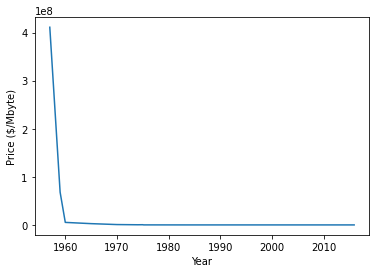

In [ ]:
plt.plot(ram_prices.date, ram_prices.price) # 선형 모델이 아님, 선형회귀를 할 수 없기에 log scale을 적용한다.
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

Text(0, 0.5, 'Price ($/Mbyte)')

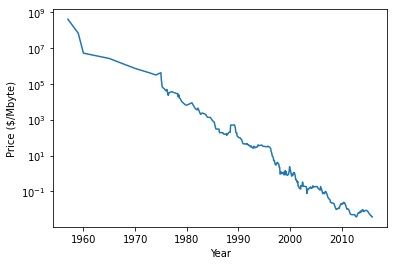

In [ ]:
plt.semilogy(ram_prices.date, ram_prices.price) # log scale plot
plt.xlabel("Year")
plt.ylabel("Price ($/Mbyte)")

In [ ]:
from sklearn.linear_model import LinearRegression

#### **[Parameters]**

**fit_intercept** : boolean, optional, default True
whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations (e.g. data is expected to be already centered).

**normalize** : boolean, optional, default False
This parameter is ignored when fit_intercept is set to False. If True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm. If you wish to standardize, please use sklearn.preprocessing.StandardScaler before calling fit on an estimator with normalize=False.

**copy_X** : boolean, optional, default True
If True, X will be copied; else, it may be overwritten.

**n_jobs** : int or None, optional (default=None)
The number of jobs to use for the computation. This will only provide speedup for n_targets > 1 and sufficient large problems. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. See Glossary for more details.

#### **[Attributes]**

**coef_** : array, shape (n_features, ) or (n_targets, n_features)
Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

**intercept_** : array Independent term in the linear model.

In [ ]:
# train data와 test data 나누기

data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price) #log scale로 만들어주기

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [ ]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# test data는 전체 기간으로 하기
X_all = ram_prices.date[:, np.newaxis]

# 예측하기
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌림
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


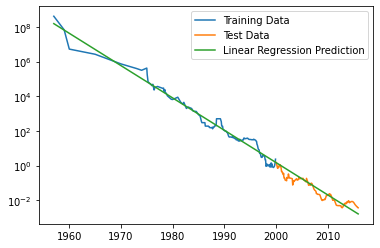

In [ ]:
plt.semilogy(data_train.date, data_train.price, label = "Training Data")
plt.semilogy(data_test.date, data_test.price, label = "Test Data")
plt.semilogy(ram_prices.date, price_lr, label = 'Linear Regression Prediction')
plt.legend()

In [ ]:
#회귀계수 확인, 연도에 따른 회귀계수 (로그변환 값)
linear_reg.coef_

array([-0.42880156])

#### **LinearRegression Methods**
**fit(X, y[, sample weight])** : fit linear model

**get_params([deep])** : get parameters for this estimator

**predict(X)** : predict using the linear model

**score(X, y[, sample_weight])** : returns the coefficient of determination of the prediction $$R^2$$

## **실습2 : California Housing Data**

In [ ]:
from IPython.display import display, HTML

#데이터 전처리 패키지
import numpy as np
import pandas as pd

#기계학습 모델 구축 및 성능 평가 패키지
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy as sp
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

#데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

#한글 폰트 설정
plt.rc('font', family='Gothic')


In [ ]:
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [ ]:
X = pd.DataFrame(california.data, columns = california.feature_names)
y = pd.DataFrame(california.target, columns = ['House Value'])

In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [ ]:
y.describe()

,House Value
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


#### 데이터 구조  
- 데이터: 1990년 캘리포니아의 각 행정 구역 내 주택 가격  
- 관측치 개수: 20640개
- 변수 개수: 설명변수 8개 / 반응변수 1개

#### 설명 변수(예측값을 설명할 수 있는 변수)      
- MedInc : 행정 구역 내 소득의 중앙값
- HouseAge : 행정 구역 내 주택 연식의 중앙값
- AveRooms : 평균 방 갯수
- AveBedrms : 평균 침실 갯수
- Population : 행정 구역 내 인구 수
- AveOccup : 평균 자가 비율
- Latitude : 해당 행정 구역의 위도
- Longitude : 해당 행정 구역의 경도 

#### 반응 변수(예측하고자 하는 값)
- House Value: 주택가격

#### 데이터 전처리


In [ ]:
data = pd.concat([X,y], axis = 1)

In [ ]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 20190625)

In [ ]:
train_data.shape

(14448, 9)

In [ ]:
test_data.shape

(6192, 9)

####  모델링
* OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS)를 최소화하는 가중치를 구하는 방법
* 모델 선언: model = sm.OLS(Y데이터, X데이터)
* 모델 학습: model_trained = model.fit()

In [ ]:
lm = sm.OLS(train_data['House Value'], train_data.drop (['House Value'], axis = 1))

In [ ]:
lm_trained = lm.fit()

#### 모델 해석


In [ ]:
display(lm_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            House Value   R-squared (uncentered):                   0.893
Model:                            OLS   Adj. R-squared (uncentered):              0.893
Method:                 Least Squares   F-statistic:                          1.506e+04
Date:                Mon, 16 Aug 2021   Prob (F-statistic):                        0.00
Time:                        06:14:22   Log-Likelihood:                         -16809.
No. Observations:               14448   AIC:                                  3.363e+04
Df Residuals:                   14440   BIC:                                  3.369e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MedInc         0.5071      0.005    101.645      0.000       0.497       0.517
HouseAge       0.0164      0.001     29.841      0.000       0.015       0.017
AveRooms      -0.1721      0.007    -23.757      0.000      -0.186      -0.158
AveBedrms      0.8081      0.035     23.416      0.000       0.740       0.876
Population   1.48e-05   6.12e-06      2.418      0.016     2.8e-06    2.68e-05
AveOccup      -0.0059      0.001     -5.963      0.000      -0.008      -0.004
Latitude      -0.0633      0.004    -14.867      0.000      -0.072      -0.055
Longitude     -0.0162      0.001    -11.987      0.000      -0.019      -0.014
==============================================================================
Omnibus:                     2967.936   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10128.918
Skew:                           1.024   Prob(JB):                         0.00
Kurtosis:                       6.554   Cond. No.                     9.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 예측 값 도출 및 예측 성능 평가

In [ ]:
train_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
9795,6.5234,18.0,7.292627,1.228111,1312.0,3.023041,36.52,-121.84,3.574
10164,4.4375,24.0,5.791304,1.095652,625.0,2.717391,33.89,-117.96,3.341
4647,2.1435,52.0,2.809524,1.000000,1920.0,2.539683,34.06,-118.31,3.289
16452,2.1979,52.0,4.804444,1.142222,437.0,1.942222,38.13,-121.27,1.141
11613,4.8000,21.0,4.603774,1.056604,1215.0,2.547170,33.80,-118.06,1.969
...,...,...,...,...,...,...,...,...,...
879,3.8179,24.0,5.115768,0.968064,1174.0,2.343313,37.56,-122.01,2.161
13751,5.0227,9.0,6.269565,0.952174,633.0,2.752174,34.05,-117.15,1.623
8520,2.6091,21.0,3.783954,1.136963,5546.0,3.178223,33.90,-118.33,1.639
1727,0.7403,37.0,4.491429,1.148571,1046.0,2.988571,37.96,-122.37,0.686


In [ ]:
train_pred = lm_trained.predict(train_data.drop(['House Value'], axis =1))

In [ ]:
train_pred

9795     3.000859
10164    2.288211
4647     2.034998
16452    1.605928
11613    2.612775
           ...   
879      1.830746
13751    2.117512
8520     1.766321
1727     0.711405
14245    1.386619
Length: 14448, dtype: float64

Text(0, 0.5, 'predict value')

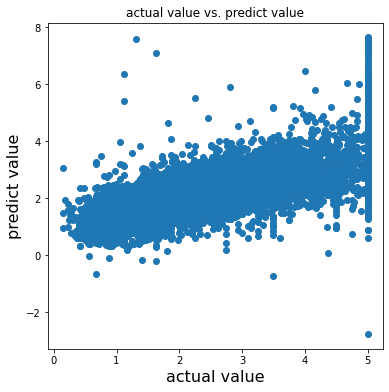

In [ ]:
plt.figure(figsize=(6,6))
plt.title('actual value vs. predict value')
plt.scatter(train_data['House Value'], train_pred)
plt.xlabel('actual value', size = 16)
plt.ylabel('predict value', size = 16)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def mean_absolute_percentage_error(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)*100)

In [ ]:
print('Training MSE: {:.3f}'.format(mean_squared_error(train_data['House Value'], train_pred)))
print('Training RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(train_data['House Value'], train_pred))))
print('Training MAE: {:.3f}'.format(mean_absolute_error(train_data['House Value'], train_pred)))
print('Training MAPE: {:.3f}'.format(mean_absolute_percentage_error(train_data['House Value'], train_pred)))
print('Training R2: {:.3f}'.format(r2_score(train_data['House Value'], train_pred)))

Training MSE: 0.600
Training RMSE: 0.775
Training MAE: 0.572
Training MAPE: 34.807
Training R2: 0.552


#### 테스트 데이터에 대한 예측 성능 평가

In [ ]:
test_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,House Value
4051,3.2241,28.0,4.188377,1.139613,2549.0,1.702739,34.15,-118.43,2.958
17595,3.3682,40.0,6.045902,1.114754,719.0,2.357377,37.31,-121.89,2.352
7100,5.6454,33.0,5.642298,1.000000,1235.0,3.224543,33.90,-117.99,2.028
7263,2.1912,37.0,2.423077,1.128205,714.0,4.576923,33.99,-118.23,1.125
12717,5.8336,36.0,7.460000,0.960000,414.0,2.760000,38.60,-121.37,2.833
...,...,...,...,...,...,...,...,...,...
17647,3.5625,32.0,5.016373,1.103275,1989.0,2.505038,37.26,-121.91,2.552
16862,4.2262,37.0,4.362369,0.958188,878.0,3.059233,37.63,-122.41,2.285
16615,3.6908,23.0,7.406475,1.273381,636.0,2.287770,35.40,-120.92,2.788
6435,3.5625,43.0,5.647416,1.048632,1054.0,3.203647,34.11,-118.01,2.116


In [ ]:
test_pred = lm_trained.predict(test_data.drop(['House Value'], axis = 1))

In [ ]:
display(test_pred)

4051     2.075514
17595    1.830442
7100     3.002480
7263     1.956814
12717    2.549611
           ...   
17647    1.987220
16862    2.366030
16615    1.713752
6435     2.133077
17715    2.541404
Length: 6192, dtype: float64

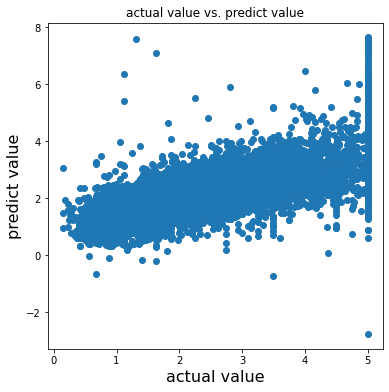

Testing MSE: 0.616
Testing RMSE: 0.785
Testing MAE: 0.576
Testing MAPE: 34.388
Testing R2: 0.532


In [42]:
plt.figure(figsize=(6,6))
plt.title('actual value vs. predict value')
plt.scatter(train_data['House Value'], train_pred)
plt.xlabel('actual value', size = 16)
plt.ylabel('predict value', size = 16)

plt.show()

print('Testing MSE: {:.3f}'.format(mean_squared_error(test_data['House Value'], test_pred)))
print('Testing RMSE: {:.3f}'.format(np.sqrt(mean_squared_error(test_data['House Value'], test_pred))))
print('Testing MAE: {:.3f}'.format(mean_absolute_error(test_data['House Value'], test_pred)))
print('Testing MAPE: {:.3f}'.format(mean_absolute_percentage_error(test_data['House Value'], test_pred)))
print('Testing R2: {:.3f}'.format(r2_score(test_data['House Value'], test_pred)))